In [647]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

In [648]:
train= pd.read_csv('train.csv', sep= ',' , encoding= ' utf-8')
test= pd.read_csv('test.csv', sep= ',' , encoding= ' utf-8')
sample=pd.read_csv('sample_submission.csv', sep=',' , encoding= ' utf-8')

In [649]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0


# Data Preprocessing

In [650]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [651]:
test.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

In [652]:
train.apply(lambda x:len(x.unique()))
## Apllying a lambda function on the dataset to return the lenght of every unique column.

enrollee_id               18359
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
target                        2
dtype: int64

In [653]:
test.apply(lambda x:len(x.unique()))
## Apllying a lambda function on the dataset to return the lenght of every unique column.

enrollee_id               15021
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
dtype: int64

In [654]:
print('gender ',train['gender'].unique())
print('relevent_experience ',train['relevent_experience'].unique())
print('enrolled_university ',train['enrolled_university'].unique())
print('education_level ',train['education_level'].unique())
print('major_discipline ',train['major_discipline'].unique())
print('experience ',train['experience'].unique())
print('company_size ',train['company_size'].unique())
print('company_type ',train['company_type'].unique())

gender  ['Male' nan 'Female' 'Other']
relevent_experience  ['Has relevent experience' 'No relevent experience']
enrolled_university  ['no_enrollment' 'Full time course' 'Part time course' nan]
education_level  ['Graduate' 'Masters' 'High School' 'Phd' nan 'Primary School']
major_discipline  ['STEM' 'Other' 'No Major' nan 'Business Degree' 'Arts' 'Humanities']
experience  ['3' '14' '6' '8' '>20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '<1' '19' '18' '17' nan '20']
company_size  ['100-500' '<10' '50-99' nan '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
company_type  ['Pvt Ltd' 'Funded Startup' 'Public Sector' nan 'Early Stage Startup'
 'NGO' 'Other']


## Data Visaulization

- Trainning data Visualization before Filling

<AxesSubplot:ylabel='gender'>

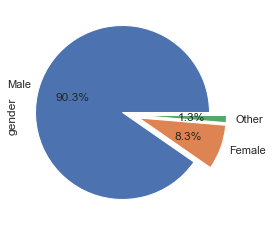

In [655]:


round(train["gender"].value_counts()/train.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1))


<AxesSubplot:ylabel='company_size'>

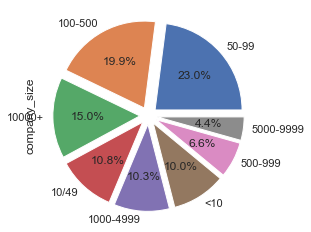

In [656]:
round(train["company_size"].value_counts()/train.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1))



<AxesSubplot:ylabel='relevent_experience'>

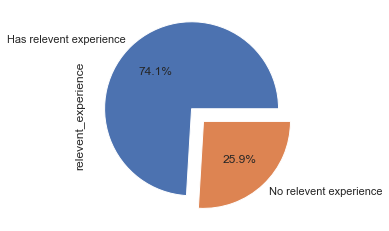

In [657]:
round(train["relevent_experience"].value_counts()/train.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1))



- Testing data Visualization before Filling

<AxesSubplot:ylabel='gender'>

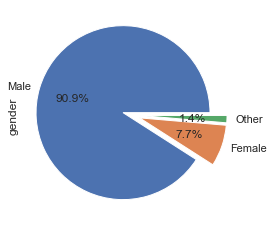

In [658]:
round(test["gender"].value_counts()/test.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1))

<AxesSubplot:ylabel='company_size'>

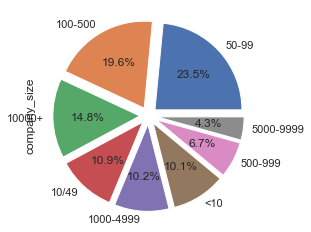

In [659]:
round(test["company_size"].value_counts()/test.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1))

<AxesSubplot:ylabel='relevent_experience'>

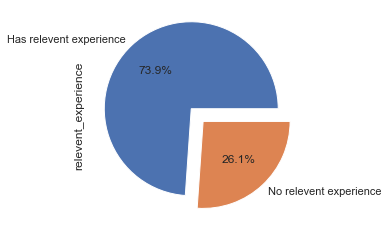

In [660]:
round(test["relevent_experience"].value_counts()/test.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1))

- Data Frame Visualization before Filling

In [661]:
df = train.append(test)
# Merging the train and test data on one Data Frame
df.apply(lambda x:len(x.unique()))
## Apllying a lambda function on the dataset to return the lenght of every unique column.

enrollee_id               33380
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
target                        3
dtype: int64

<AxesSubplot:ylabel='gender'>

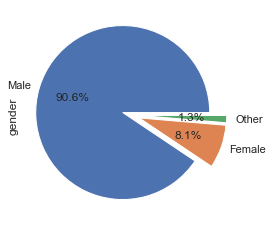

In [662]:
round(df["gender"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1))



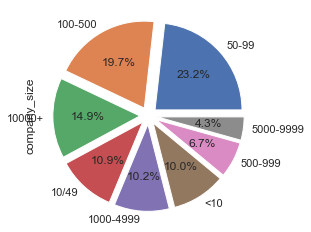

In [663]:
round(df["company_size"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1))
plt.savefig("size.png") # save as png


<AxesSubplot:ylabel='relevent_experience'>

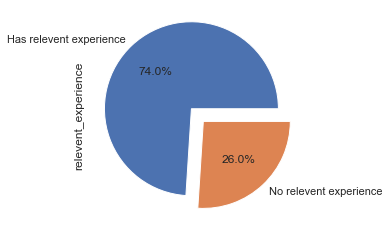

In [664]:
round(df["relevent_experience"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1))

## So >>> Trainning data, testing data and DataFrame have all the same visualization result , so we will copy the data frame and visualize all the features of the data at once.

**`Filling missing data by getting values from forward cells`**

In [665]:
df1=df.drop('target',axis=1)
df1.fillna(method="pad", inplace=True)
df1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69
2,46,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26
4,21751,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,2,88


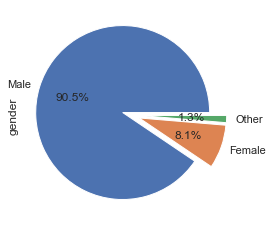

In [666]:
round(df1["gender"].value_counts()/df1.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1))
plt.savefig("gender.png") # save as png

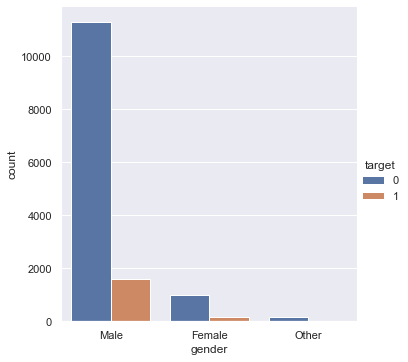

In [667]:
sns.catplot(data=train, kind="count", x="gender",hue='target')


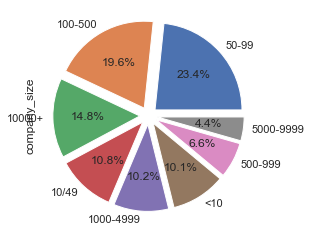

In [668]:
round(df1["company_size"].value_counts()/df1.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1))
plt.savefig("size.png") # save as png

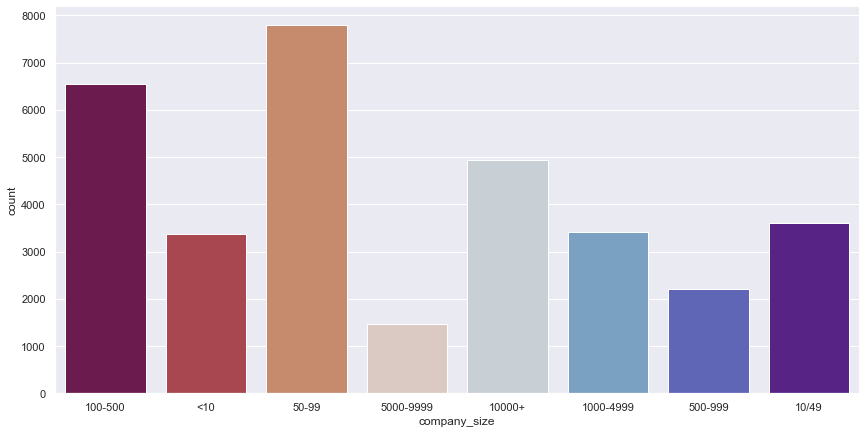

In [669]:
sns.set_theme(style="darkgrid")

sns.catplot(data=df1, kind="count", x="company_size",height=6
    ,aspect=2,saturation=1,palette='twilight_shifted_r')


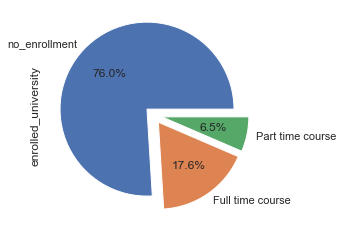

In [670]:
round(df1["enrolled_university"].value_counts()/df1.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1))
plt.savefig("enrolled.png") # save as png

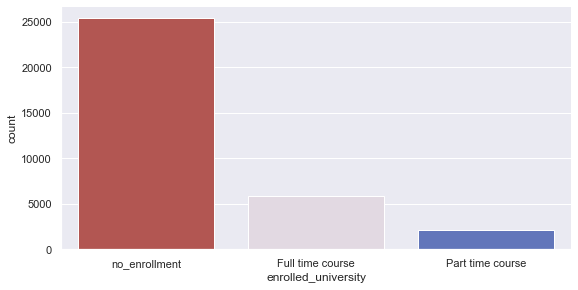

In [671]:
sns.set_theme(style="darkgrid")

sns.catplot(data=df1, kind="count", x="enrolled_university",height=4
    ,aspect=2,saturation=1,palette='twilight_shifted_r')


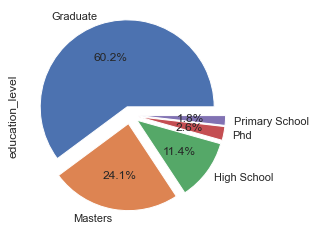

In [672]:
round(train["education_level"].value_counts()/train.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1,0.1,0.1))
plt.savefig("level.png") # save as png

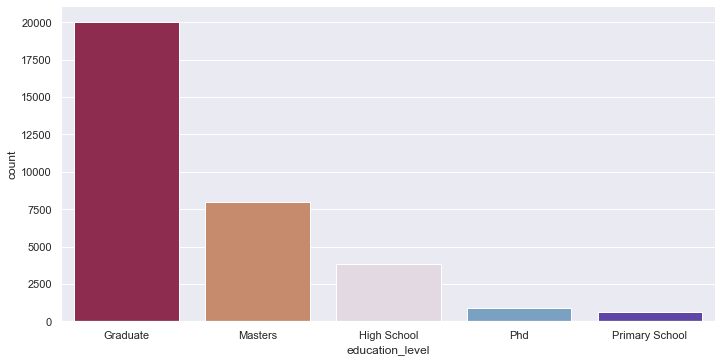

In [673]:
sns.set_theme(style="darkgrid")

sns.catplot(data=df1, kind="count", x="education_level",height=5
    ,aspect=2,saturation=1,palette='twilight_shifted_r')


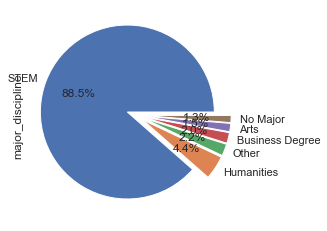

In [674]:
round(train["major_discipline"].value_counts()/train.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1,0.1,0.1,0.1))
plt.savefig("dis.png") # save as png

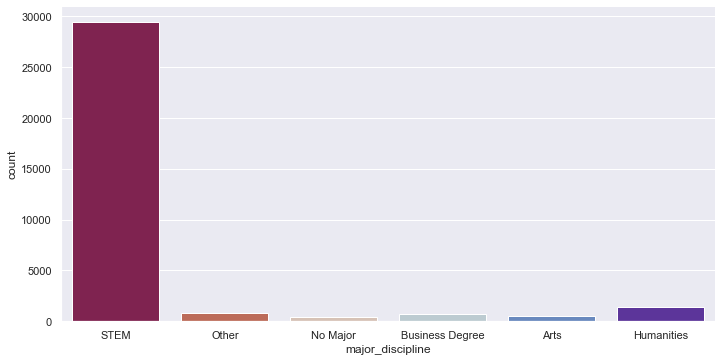

In [675]:
sns.set_theme(style="darkgrid")

sns.catplot(data=df1, kind="count", x="major_discipline",height=5
    ,aspect=2,saturation=1,palette='twilight_shifted_r')


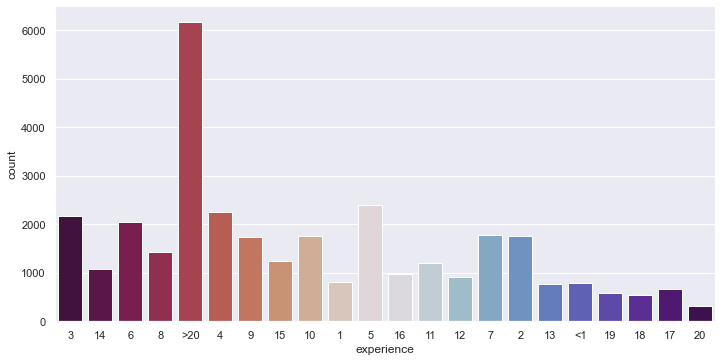

In [676]:
sns.set_theme(style="darkgrid")

sns.catplot(data=df1, kind="count", x="experience",height=5
    ,aspect=2,saturation=1,palette='twilight_shifted_r')


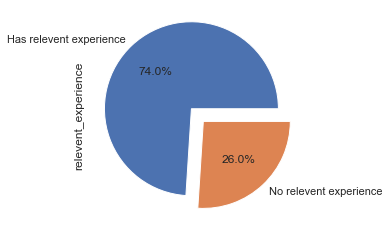

In [677]:
sns.set_theme(style="darkgrid")

round(df1["relevent_experience"].value_counts()/df1.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1))
plt.savefig("rel.png") # save as png

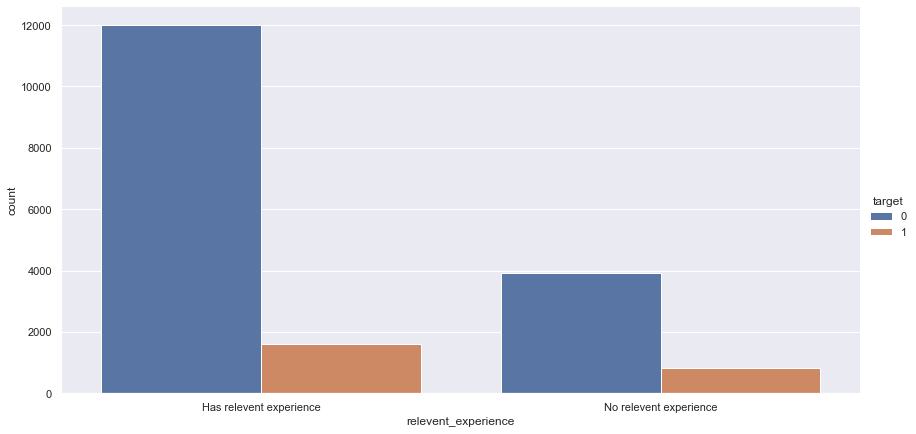

In [678]:
sns.set_theme(style="darkgrid")

sns.catplot(data=train, kind="count", x="relevent_experience",hue='target',height=6
    ,aspect=2,)


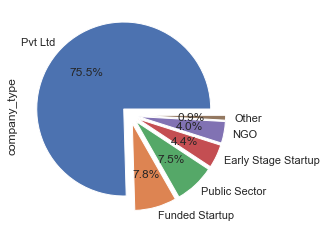

In [679]:
round(train["company_type"].value_counts()/train.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',explode = (0.1, 0.1, 0.1,0.1,0.1,0.1))
plt.savefig("type.png") # save as png

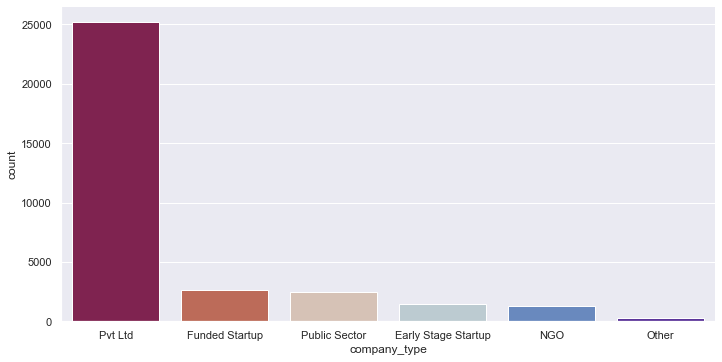

In [680]:
sns.set_theme(style="darkgrid")

sns.catplot(data=df1, kind="count", x="company_type",height=5
    ,aspect=2,saturation=1,palette='twilight_shifted_r')


**` Getting The train and test data again after Filling for Encoding and Modelling `**

In [681]:
train.fillna(method="pad", inplace=True)
test.fillna(method="pad", inplace=True)

In [682]:
train.isnull().sum()


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [683]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    1
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              1
training_hours            0
dtype: int64

#### There is only one Missing Data in both (gender and last new job) on test data so I will fill them with the mode. 

In [684]:
test['gender'].fillna(test['gender'].mode()[0], inplace=True)
test['last_new_job'].fillna(test['last_new_job'].mode()[0], inplace=True)

- Finding The relation between Features and target after Filling

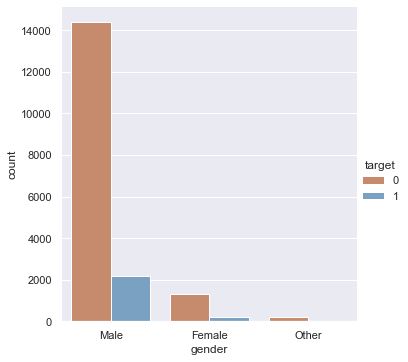

In [685]:
sns.set_theme(style="darkgrid")

sns.catplot(data=train, kind="count", x="gender",hue='target',height=5
    ,aspect=1,saturation=1,palette='twilight_shifted_r')
plt.savefig("gender1.png") # save as png

In [686]:
train.replace('no_enrollment',0, inplace= True)
train.replace('Full time course',1, inplace= True)
train.replace('Part time course',0.5, inplace= True)

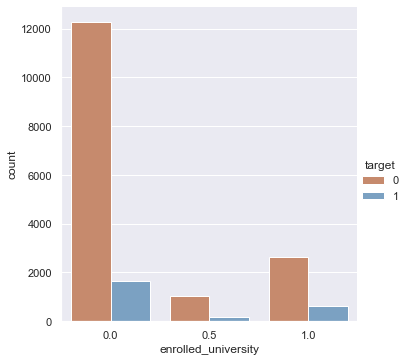

In [687]:
sns.set_theme(style="darkgrid")

sns.catplot(data=train, kind="count", x="enrolled_university",hue='target',height=5
    ,aspect=1,saturation=1,palette='twilight_shifted_r')
plt.savefig("enrolled1.png") # save as png

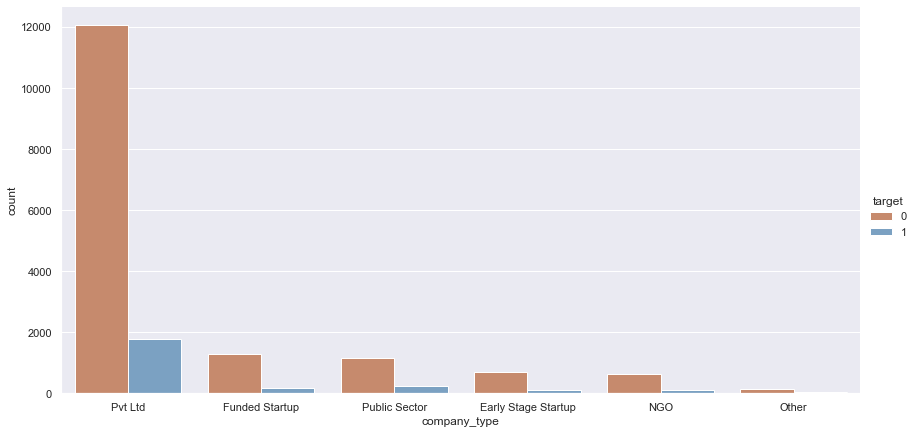

In [688]:
sns.set_theme(style="darkgrid")

sns.catplot(data=train, kind="count", x="company_type",hue='target',height=6
    ,aspect=2,saturation=1,palette='twilight_shifted_r')
plt.savefig("type1.png") # save as png

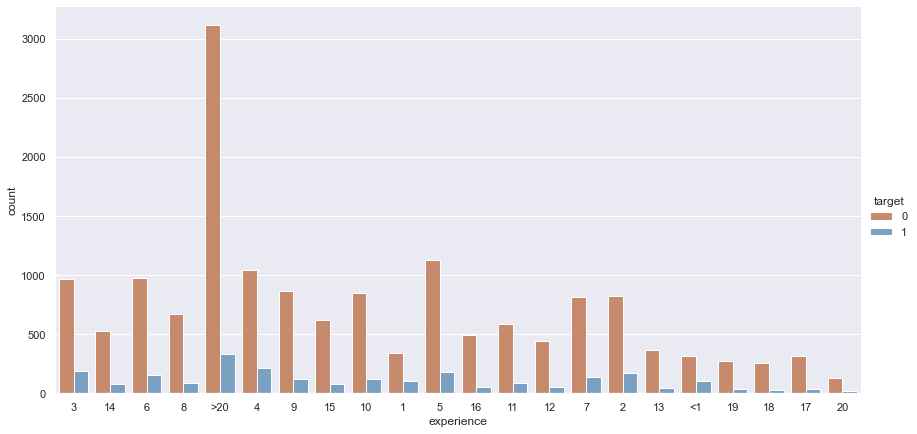

In [689]:
sns.set_theme(style="darkgrid")

sns.catplot(data=train, kind="count", x="experience",hue='target',height=6
    ,aspect=2,saturation=1,palette='twilight_shifted_r')
plt.savefig("ex1.png") # save as png

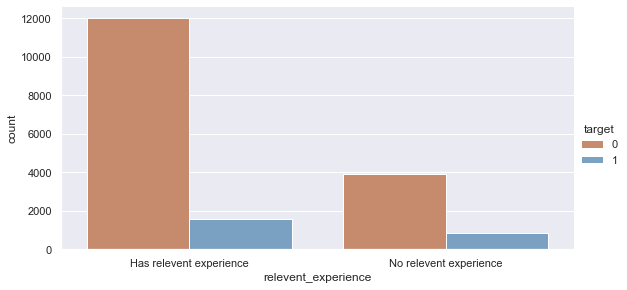

In [690]:
sns.set_theme(style="darkgrid")

sns.catplot(data=train, kind="count", x="relevent_experience",hue='target',height=4
    ,aspect=2,saturation=1,palette='twilight_shifted_r')
plt.savefig("rel1.png") # save as png

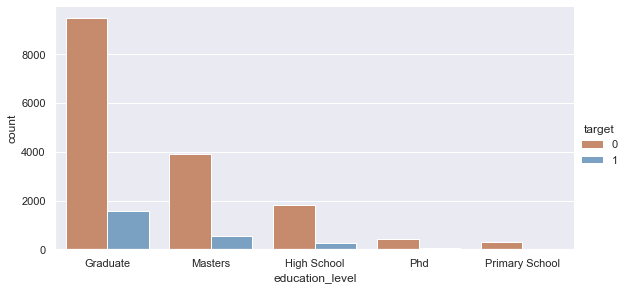

In [691]:
sns.set_theme(style="darkgrid")

sns.catplot(data=train, kind="count", x="education_level",hue='target',height=4
    ,aspect=2,saturation=1,palette='twilight_shifted_r')
plt.savefig("level1.png") # save as png

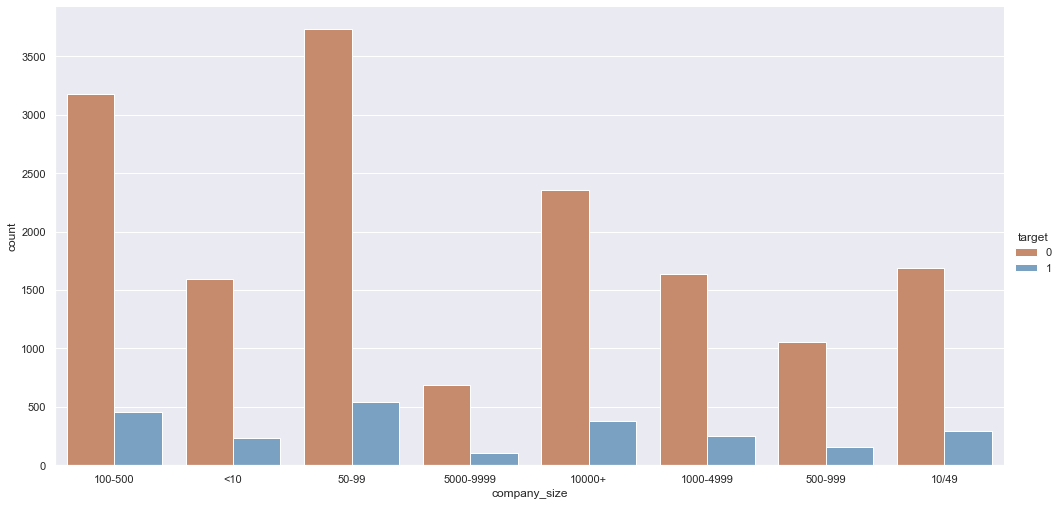

In [692]:
sns.set_theme(style="darkgrid")

sns.catplot(data=train, kind="count", x="company_size",hue='target',height=7
    ,aspect=2,saturation=1,palette='twilight_shifted_r')

plt.savefig("size1.png") # save as png

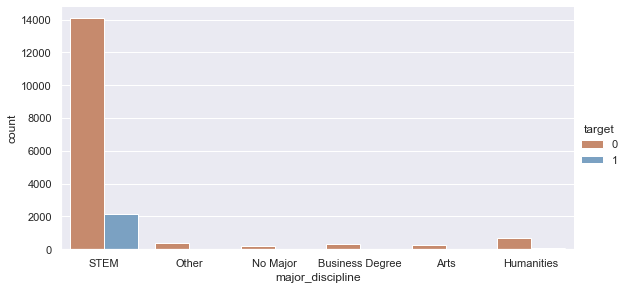

In [693]:
sns.catplot(data=train, kind="count", x="major_discipline",hue='target',height=4
    ,aspect=2,saturation=1,palette='twilight_shifted_r')
plt.savefig("dis1.png") # save as png

## Encoding Data

In [694]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'housing','loan'. 
les = {}
for col in ['gender','company_size','city', 'relevent_experience','education_level','major_discipline','company_type','experience','last_new_job']:
    les[col] = label_encoder
    train[col]  = les[col].fit_transform(train[col])
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,41,0.689,1,0,0.0,0,5,13,1,5,0,106,0
1,29166,112,0.923,1,0,0.0,0,5,5,7,1,0,69,0
2,46,48,0.910,1,0,0.0,0,5,16,4,4,1,4,0
3,18527,93,0.666,1,0,0.0,0,5,5,4,5,0,26,0
4,21751,2,0.887,1,1,0.0,2,5,18,4,5,1,88,1


In [695]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

les = {}
for col in ['gender','company_size','city', 'relevent_experience','education_level','major_discipline','company_type','enrolled_university',
            'experience','last_new_job']:
    les[col] = label_encoder
    test[col]  = les[col].fit_transform(test[col])
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,73,0.448,1,1,0,0,5,20,2,4,0,15
1,12036,70,0.939,1,1,2,0,5,21,4,5,0,94
2,11061,5,0.920,1,1,0,0,5,13,4,5,0,17
3,5032,6,0.924,1,1,2,3,5,21,4,5,1,76
4,17599,105,0.830,1,0,2,0,5,16,7,5,1,65


In [696]:
def normalize_col(col_name):
    return (train[col_name] - train[col_name].min())/(train[col_name].max()-train[col_name].min())
train['company_size']=normalize_col('company_size')
train['company_type']=normalize_col('company_type')
train['training_hours']=normalize_col('training_hours')
train['major_discipline']=normalize_col('major_discipline')
train.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,41,0.689,1,0,0.0,0,1.0,13,0.142857,1.0,0,0.313433,0
1,29166,112,0.923,1,0,0.0,0,1.0,5,1.000000,0.2,0,0.202985,0
2,46,48,0.910,1,0,0.0,0,1.0,16,0.571429,0.8,1,0.008955,0
3,18527,93,0.666,1,0,0.0,0,1.0,5,0.571429,1.0,0,0.074627,0
4,21751,2,0.887,1,1,0.0,2,1.0,18,0.571429,1.0,1,0.259701,1


In [697]:
def normalize_col(col_name):
    return (train[col_name] - train[col_name].min())/(train[col_name].max()-train[col_name].min())
test['company_size']=normalize_col('company_size')
test['company_type']=normalize_col('company_type')
test['training_hours']=normalize_col('training_hours')
test['major_discipline']=normalize_col('major_discipline')
test.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,73,0.448,1,1,0,0,1.0,20,0.142857,1.0,0,0.313433
1,12036,70,0.939,1,1,2,0,1.0,21,1.000000,0.2,0,0.202985
2,11061,5,0.920,1,1,0,0,1.0,13,0.571429,0.8,0,0.008955
3,5032,6,0.924,1,1,2,3,1.0,21,0.571429,1.0,1,0.074627
4,17599,105,0.830,1,0,2,0,1.0,16,0.571429,1.0,1,0.259701


In [698]:
train.drop(['enrollee_id','city', 'city_development_index'], axis=1,inplace=True)

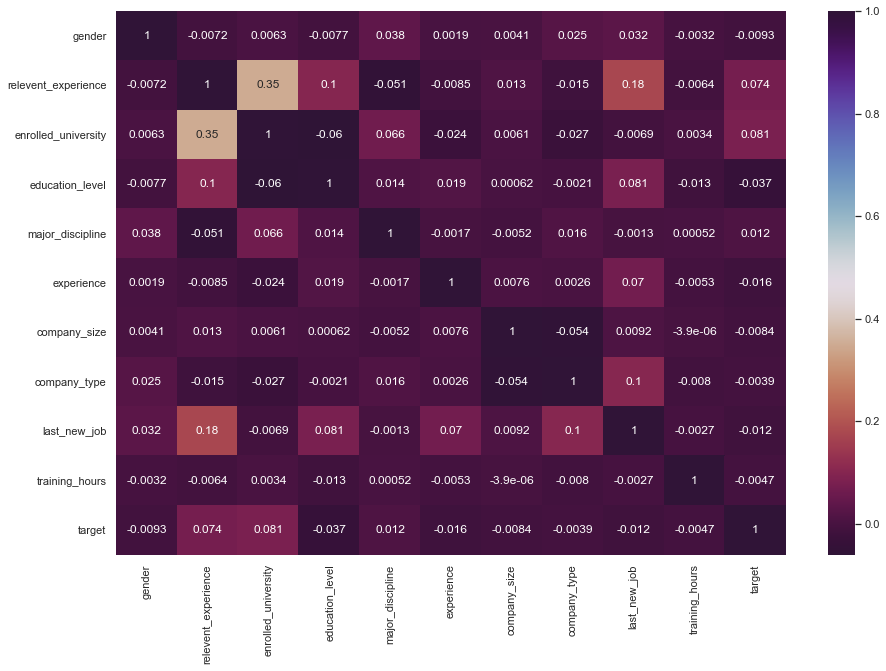

In [699]:
# linear crr

plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),cbar = True, annot =True,cmap='twilight_shifted_r')
plt.savefig("crr.png") # save as png

In [700]:
train.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [701]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,0,0.0,0,1.0,13,0.142857,1.0,0,0.313433,0
1,1,0,0.0,0,1.0,5,1.000000,0.2,0,0.202985,0
2,1,0,0.0,0,1.0,16,0.571429,0.8,1,0.008955,0
3,1,0,0.0,0,1.0,5,0.571429,1.0,0,0.074627,0
4,1,1,0.0,2,1.0,18,0.571429,1.0,1,0.259701,1


In [702]:
print('relevent_experience ',train['relevent_experience'].unique())
print('enrolled_university ',train['enrolled_university'].unique())


relevent_experience  [0 1]
enrolled_university  [0.  1.  0.5]


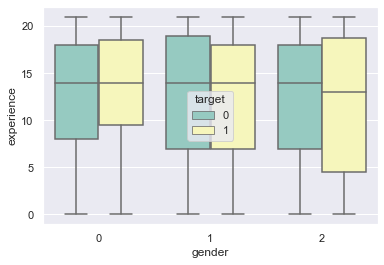

In [703]:
sns.set_theme(style="darkgrid")

sns.boxplot(x="gender", y="experience", hue="target",
                 data=train, palette="Set3")
plt.savefig("box.png") # save as png

## SO >>>> The most qualified applicant for the data analysis Internship :

- Gender : Male ( There is gender equality despite of the number of male applicants is morevthan females but the targetting is nearly equvalent). This is shown in the boxplot above.

- More than 20 years experience.

- Has relevent experience.

- Last job was at PVT LTD Company.

- Not currently enrolled at University.

- Major is STEM.

- Graduated

In [704]:
#Calculating ppscore
import ppscore as pps
c=pps.matrix(train)
c

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,gender,gender,1.0,predict_itself,True,None,0.000000,1.000000,None
1,gender,relevent_experience,0.0,regression,True,mean absolute error,0.268000,0.392247,DecisionTreeRegressor()
2,gender,enrolled_university,0.0,regression,True,mean absolute error,0.206300,0.314393,DecisionTreeRegressor()
3,gender,education_level,0.0,regression,True,mean absolute error,0.753200,0.902005,DecisionTreeRegressor()
4,gender,major_discipline,0.0,regression,True,mean absolute error,0.069120,0.122032,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,target,company_size,0.0,regression,True,mean absolute error,0.241143,0.242680,DecisionTreeRegressor()
117,target,company_type,0.0,regression,True,mean absolute error,0.151040,0.226762,DecisionTreeRegressor()
118,target,last_new_job,0.0,regression,True,mean absolute error,1.637000,1.757030,DecisionTreeRegressor()
119,target,training_hours,0.0,regression,True,mean absolute error,0.126509,0.136101,DecisionTreeRegressor()


<AxesSubplot:xlabel='x', ylabel='y'>

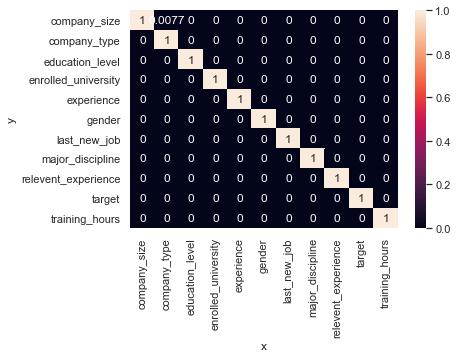

In [705]:
figsize=(30,30)
a = pps.matrix(train).pivot(columns='x', index='y', values='ppscore')
sns.heatmap(a, annot=True)

#ppscore  non linear crr

In [706]:
pip install ppscore

In [707]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

------------------------
**` 1-LogisticRegression`**
----------------------

In [708]:
train.shape


(18359, 11)

In [709]:
train.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [710]:
X = train.drop('target',axis=1).values
Y = train['target'].values

In [711]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [712]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11015, 10)
(7344, 10)
(11015,)
(7344,)


In [713]:
# Train and predict.
LL = LogisticRegression(solver='liblinear')
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)                            # Out-of-sample prediction. 

In [714]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[6346    0]
 [ 998    0]]


In [715]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
Recall = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.864
Recall  = 0.0
Precision   = 0.0


In [716]:
confusion_matrix(Y_test,LL.predict(X_test))

array([[6346,    0],
       [ 998,    0]], dtype=int64)

------------------------
**`-2-  - KNN CLF`**
----------------------

In [717]:
kclf = KNeighborsClassifier(n_neighbors=5,)
#the distance metric to use for the tree. The default metric is minkowski, 
#and with p=2 is equivalent to the standard Euclidean metric

In [718]:
kclf.fit(X_train,Y_train)

KNeighborsClassifier()

In [719]:
Y_pred_test = kclf.predict(X_test)                            # Out-of-sample prediction. 

In [720]:
kclf.score(X_train,Y_train)

0.876078075351793

In [721]:
kclf.score(X_test,Y_test)

0.8523965141612201

In [722]:
confusion_matrix(Y_test,kclf.predict(X_test))

array([[6222,  124],
       [ 960,   38]], dtype=int64)

In [723]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
Recall = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.852
Recall  = 0.038
Precision   = 0.235


-----------------------
**`-3-  SVM`**
--------------------

In [724]:
svm = SVC()
svm.fit(X_train,Y_train)
Y_pred_test = svm.predict(X_test)                            # Out-of-sample prediction. 

In [725]:
svm.score(X_test,Y_test)

0.8641067538126361

In [726]:
svm.score(X_train,Y_train)

0.8704493871992737

In [727]:
confusion_matrix(Y_test,svm.predict(X_test))

array([[6346,    0],
       [ 998,    0]], dtype=int64)

In [728]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
Recall = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.864
Recall  = 0.0
Precision   = 0.0


-----------------------
**`-4-  Navie Bayes`**
--------------------

In [729]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
gnb.predict(X_test)
Y_pred_test = gnb.predict(X_test)                            # Out-of-sample prediction. 

In [730]:
gnb.score(X_train,Y_train)

0.8651838402178847

In [731]:
gnb.score(X_test,Y_test)

0.8586601307189542

In [732]:
confusion_matrix(Y_test,gnb.predict(X_test))

array([[6294,   52],
       [ 986,   12]], dtype=int64)

In [733]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
Recall = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.859
Recall  = 0.012
Precision   = 0.188


-----------------------
**`-5- Random Forest`**
--------------------

In [734]:
clf = RandomForestClassifier(max_depth=5000,max_features='auto')
clf.fit(X_train,Y_train)
Y_pred_test=clf.predict(X_test)
confusion_matrix(Y_test,clf.predict(X_test))

array([[6261,   85],
       [ 978,   20]], dtype=int64)

In [735]:
print("random forest F1-score",f1_score(Y_test,Y_pred_test))
print("random forest Recall: ",recall_score(Y_test,Y_pred_test))

random forest F1-score 0.03626473254759746
random forest Recall:  0.02004008016032064


In [736]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
Recall = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.855
Recall  = 0.02
Precision   = 0.19


-----------------------
**`-6- RandomForestClassifier with grid`**
--------------------

In [737]:
param_grid ={
    'max_depth': [10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [20, 40 ]
}


In [738]:
clf = RandomForestClassifier(max_depth=10, n_estimators=20)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1,verbose=1)
grid_result = grid.fit(X_train, Y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best: 0.870268 using {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 40}


In [739]:
model=grid_result.best_estimator_

In [740]:
model

RandomForestClassifier(max_depth=10, n_estimators=40)

In [741]:
model_pre=model.predict(X_test)

In [742]:
accuracy_score(Y_test,model_pre)

0.8639705882352942

In [743]:
conf_mat=confusion_matrix(Y_test,model_pre)

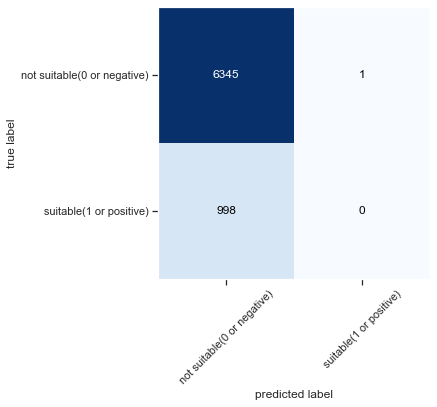

In [744]:
plot_confusion_matrix(conf_mat,class_names=["not suitable(0 or negative)","suitable(1 or positive)"],figsize=(12,5)); #fn

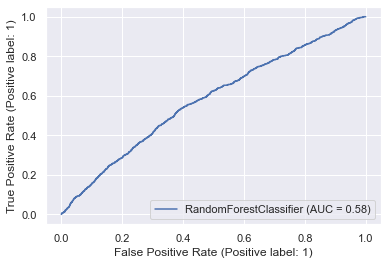

In [745]:
plot_roc_curve(model, X_test, Y_test)

-----------------------
**`-7- XGBoost `**
--------------------

In [746]:
xgb= XGBClassifier(loss='exponential', learning_rate=0.05, n_estimators=1000, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_depth=10, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
                              
xgb.fit(X_train, Y_train)

[22:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "presort", "tol", "validation_fraction", "verbose", "warm_start" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='friedman_mse',
              gamma=0, gpu_id=-1, importance_type='gain', init=None,
              interaction_constraints='', learning_rate=0.05,
              loss='exponential', max_delta_step=0, max_depth=10,
              max_features=None, max_leaf_nodes=None, min_child_weight=1,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, missing=nan,
              monotone_constraints='()', n_estimators=1000,
              n_iter_no_change=None, n_jobs=12, num_parallel_tree=1,
              presort='deprecated', ...)

In [747]:
Y_pred_test=xgb.predict(X_test)

In [748]:
xgb.score(X_train,Y_train)

0.9769405356332275

In [749]:
xgb.score(X_test,Y_test)

0.8458605664488017

In [750]:
xgb.score(X_train,Y_train)

0.9769405356332275

In [751]:
xgb.score(X_test,Y_test)

0.8458605664488017

In [752]:
conf_mat=confusion_matrix(Y_test,xgb.predict(X_test))

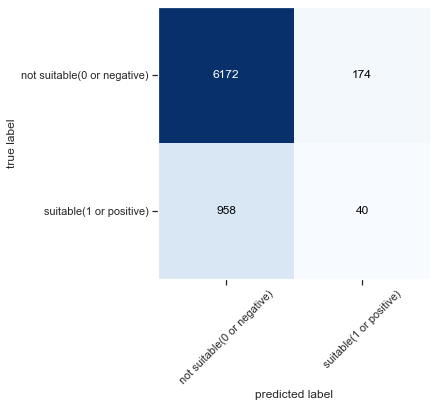

In [753]:
plot_confusion_matrix(conf_mat,class_names=["not suitable(0 or negative)","suitable(1 or positive)"],figsize=(12,5)); #fn

In [754]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
Recall = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Recall  = {}'.format(np.round(Recall,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.846
Recall  = 0.04
Precision   = 0.187


## SO >>>> After Modelling I See that the XGBoost classifier gets the best results.

In [755]:
cols=train.columns
cols

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours', 'target'],
      dtype='object')

#pip install lightgbm


In [756]:
X_train=train[cols[:len(cols)-1]]
Y_train=train['target']
X_test=test[cols[:len(cols)-1]]

In [757]:
target = 'target'
scoring_parameter = 'balanced-accuracy'

In [758]:
#pip install autoviml

In [759]:

def Xg_boost(Xtrain,Ytrain,Xtest):
    xg = XGBClassifier(loss='exponential', learning_rate=0.05, n_estimators=1000, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_depth=10, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
    xg.fit(Xtrain, Ytrain) 
    xg_prediction = xg.predict(Xtest)
    return xg_prediction


In [760]:
pred_xg = Xg_boost(X_train,Y_train,X_test)


[22:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "presort", "tol", "validation_fraction", "verbose", "warm_start" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [761]:
pred_xg = Xg_boost(X_train,Y_train,X_test)


[22:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "presort", "tol", "validation_fraction", "verbose", "warm_start" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [762]:
sample['target'] = pred_xg
print(sample['target'].unique())
sample.to_csv('XG.csv',index = False)

[1 0]


In [763]:
dict(sample['target'])

{0: 1,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 1,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 1,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 1,
 76: 0,
 77: 0,
 78: 0,
 79: 1,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 1,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12